# Banknote Authentication with Naïve Bayes

In this notebook, we will use the build a Naïve Bayes classifier that will help us classify whether a banknote is genuine or fraudulent based on a range of statistical features. Note that the dataset used in this notebook can be obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#).

## What is a Naïve Bayes Classifier?

A Naïve Bayes classifier is a simple probabilistic machine learning algorithm based on Bayes' theorem with the naive assumption of conditional independence between predictors in any given dataset.

The Naïve Bayes classifier can be described by a 'decision rule': given a vector $X = (x_1, x_2, ..., x_n)$ of $n$ predictors and a vector $C = (c_1, c_2, ..., c_n)$, Naïve Bayes classifier is defined as

$$
C_{NB_{MAP}} = \underset{K = \{1, ..., k\}}{\operatorname{argmax}} p(c_{K}) \prod^{n}_{i = 1} p(x_{i} \mid c_{K}),
$$

where $C_{NB_{MAP}}$ is the 'Maximum a Posteriori', $p(c_{K})$ is the prior probability (of the class $c_{K}$), and $\prod^{n}_{i = 1} p(x_{i} \mid c_{K})$ is the likelihood. 

Note that Naïve Bayes is a supervised machine learning algorithm; that is, we train the model using a labelled dataset.

## Import Packages

In order to import the dataset into Python, visualize the data, etc. we need to import the necessary Python packages into this notebook.

In [1]:
# import packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt, pi, exp
import random

## Set Random Seed

For reproducibility of results, we are required to set the random seed

In [2]:
np.random.seed(10)

## Dataset

The 'banknote authentication' dataset consists of four continuous predictors which are based on images of genuine and fraudulent banknotes; these are listed below:
- Variance of Wavelet Transformed image
- Skewness of Wavelet Transformed image
- Kurtosis of Wavelet Transformed image
- Entropy of image

Note that Wavelet Transformations have been used to "gain and analyze the spectral components of banknote representations". Also note that observations belonging to class '0' are genuine banknotes, and observations belonging to class '1' are fraudulent banknotes.

The dataset has been stored in text file format; in order to analyze and model, we will read the data into a pandas dataframe. Once the data is accessible via a dataframe, the required data wrangling/processing and exploratory data analysis will be completed.

In [3]:
# read dataset into pandas dataframe
banknote_data = pd.read_csv('Banknote Authentication.txt', sep=',', header=None)
# display first few rows of banknote_data
display(banknote_data.head())

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# rename banknote_data columns
# note that WLT is short for Wavelet Transform
banknote_data = banknote_data.rename(columns={0:'WLT Image Variance', 1:'WLT Image Skewness', 2:'WLT Image Kurtosis', 3:'Image Entropy', 4:'Class'})

# check for any NaN values in banknote_data 
banknote_data.isnull().sum()

WLT Image Variance    0
WLT Image Skewness    0
WLT Image Kurtosis    0
Image Entropy         0
Class                 0
dtype: int64

In [5]:
# create a new dataframe to store descriptive statistics of banknote_data (predictor) columns
banknote_descriptive_stat = pd.DataFrame(columns=['Number of Observations', 'Mean', 'Standard Deviation', 'Minimum', 'Maximum'],
                                         index=['WLT Image Variance', 'WLT Image Skewness', 'WLT Image Kurtosis', 'Image Entropy'])

# calculate/retrieve relevant descriptive statistics and store in banknote_descriptive_stat
# loop over rows in banknote_descriptive_stat
for index, rows in banknote_descriptive_stat.iterrows():
    # retrieve number of observations for relevant predictor
    banknote_descriptive_stat.loc[index, 'Number of Observations'] = banknote_data[index].count()
    # calculate the mean for relevant predictor
    banknote_descriptive_stat.loc[index, 'Mean'] = banknote_data[index].mean()
    # calculate the standard deviation for relevant predictor
    banknote_descriptive_stat.loc[index, 'Standard Deviation'] = banknote_data[index].std()
    # retrieve the minimum for relevant predictor
    banknote_descriptive_stat.loc[index, 'Minimum'] = banknote_data[index].min()
    # retrieve the maximum for relevant predictor
    banknote_descriptive_stat.loc[index, 'Maximum'] = banknote_data[index].max()

# display banknote_descriptive_stat
display(banknote_descriptive_stat)

,Number of Observations,Mean,Standard Deviation,Minimum,Maximum
WLT Image Variance,1372,0.433735,2.84276,-7.0421,6.8248
WLT Image Skewness,1372,1.92235,5.86905,-13.7731,12.9516
WLT Image Kurtosis,1372,1.39763,4.31003,-5.2861,17.9274
Image Entropy,1372,-1.19166,2.10101,-8.5482,2.4495


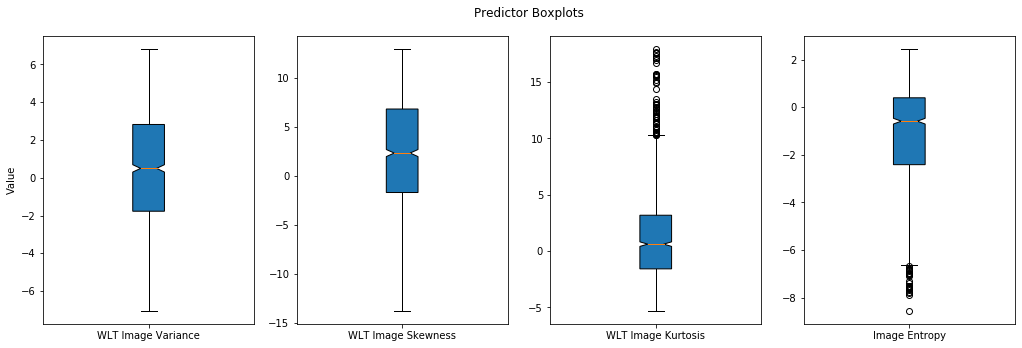

In [6]:
# create boxplots for predictors of banknote_data
# pyplot subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))

# plot WLT Image Variance predictor values on boxplot
axes[0].boxplot(banknote_data['WLT Image Variance'], patch_artist=True, notch=True)
plt.sca(axes[0])
plt.xticks([1], ['WLT Image Variance'])
plt.ylabel('Value')

# plot WLT Image Skewness predictor values on boxplot 
axes[1].boxplot(banknote_data['WLT Image Skewness'], patch_artist=True, notch=True)
plt.sca(axes[1])
plt.xticks([1], ['WLT Image Skewness'])

# plot WLT Image Kurtosis predictor values on boxplot
axes[2].boxplot(banknote_data['WLT Image Kurtosis'], patch_artist=True, notch=True)
plt.sca(axes[2])
plt.xticks([1], ['WLT Image Kurtosis'])

# plot Image Entropy predictor values on boxplot
axes[3].boxplot(banknote_data['Image Entropy'], patch_artist=True, notch=True)
plt.sca(axes[3])
plt.xticks([1], ['Image Entropy'])

# adjust spacing properties of subplot
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9,
                    hspace=0.2, wspace=0.2)
# set title of subplot figure
fig.suptitle('Predictor Boxplots')

# display boxplots
plt.show()

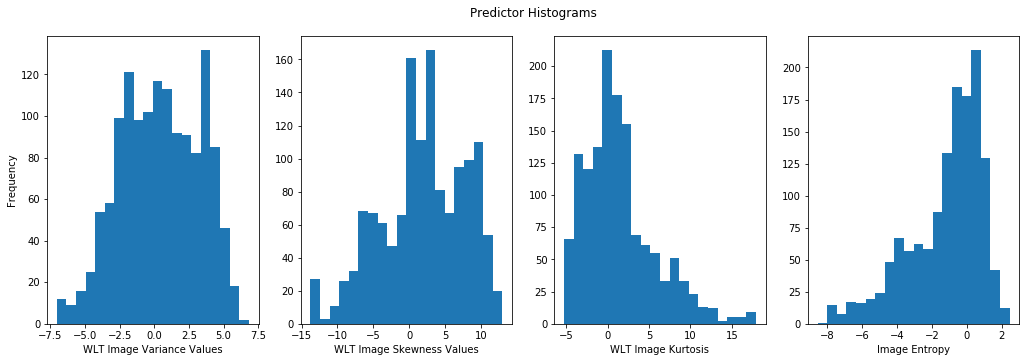

In [7]:
# create histograms for predictors of banknote_data
# pyplot subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))

# plot WLT Image Variance predictor values on histogram
axes[0].hist(banknote_data['WLT Image Variance'], bins=20)
plt.sca(axes[0])
plt.xlabel('WLT Image Variance Values')
plt.ylabel('Frequency')

# plot WLT Image Skewness predictor values on histogram
axes[1].hist(banknote_data['WLT Image Skewness'], bins=20)
plt.sca(axes[1])
plt.xlabel('WLT Image Skewness Values')

# plot WLT Image Kurtosis predictor values on histogram
axes[2].hist(banknote_data['WLT Image Kurtosis'], bins=20)
plt.sca(axes[2])
plt.xlabel('WLT Image Kurtosis')

# plot Image Entropy predictor values on histogram
axes[3].hist(banknote_data['Image Entropy'], bins=20)
plt.sca(axes[3])
plt.xlabel('Image Entropy')

# adjust spacing properties of subplot
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9,
                    hspace=0.2, wspace=0.2)
# set title of subplot figure
fig.suptitle('Predictor Histograms')

# display histograms
plt.show()

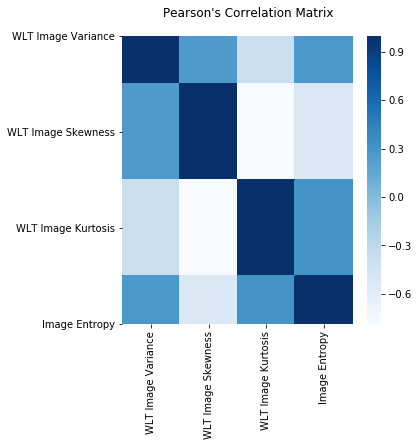

In [8]:
# create correlation heatmap for predictors of banknote_data
# pyplot subplots
fig, axes = plt.subplots(figsize=(5, 5))

# plot seaborn heatmap using pearson's correlation coefficient 
sns.heatmap(banknote_data.drop(['Class'], axis=1).corr(method='pearson'), cmap='Blues', ax=axes)
# adjust rotation of x tick labels and y tick labels
axes.set_yticklabels(['WLT Image Variance', 'WLT Image Skewness', 'WLT Image Kurtosis', 'Image Entropy'], rotation=0)
axes.set_xticklabels(['WLT Image Variance', 'WLT Image Skewness', 'WLT Image Kurtosis', 'Image Entropy'], rotation=90)

# adjust spacing properties of subplot
fig.subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9,
                    hspace=0.2, wspace=0.2)
# set title of subplot figure
fig.suptitle('Pearson\'s Correlation Matrix')

# display heatmap
plt.show()

In [9]:
# retrieve class distribution of banknote_data
# create new dataframe to store frequency and proportion of observations belonging to each class (genuine or fraudulent)
banknote_class_dist = pd.DataFrame(columns=['Genuine Observations', 'Fraudulent Observations'], 
                                   index=['Frequency', 'Proportion'])

# retrieve frequency of each class
genuine_freq = banknote_data.loc[banknote_data['Class']==0, 'Class'].count()
fraudulent_freq = banknote_data.loc[banknote_data['Class']==1, 'Class'].count()
# calculate proportion of each class
genuine_prop = round(genuine_freq/banknote_data['Class'].count(), 2)
fraudulent_prop = round(fraudulent_freq/banknote_data['Class'].count(), 2)

# store frequency and proportion values in banknote_class_dist
banknote_class_dist.loc['Frequency', 'Genuine Observations'] = genuine_freq
banknote_class_dist.loc['Frequency', 'Fraudulent Observations'] = fraudulent_freq
banknote_class_dist.loc['Proportion', 'Genuine Observations'] =  genuine_prop
banknote_class_dist.loc['Proportion', 'Fraudulent Observations'] = fraudulent_prop

# display banknote_class_dist
display(banknote_class_dist)

,Genuine Observations,Fraudulent Observations
Frequency,762,610
Proportion,0.56,0.44


From the exploratory data analysis conducted, the following points are evident:
- The WLT Image Variance and WLT Image Skewness predictors do not contain any outlier values while the WLT Image Kurtosis and Image Entropy predictors do contain a few outlier values.
- The histogram plots show that the WLT Image Variance predictor has a normal distribution, whilst the WLT Image Skewness predictor has a 'relative' normal distribution (the data for this predictor is slightly skewed to the left). The WLT Image Kurtosis and Image Entropy predictors have a right-skewed and left-skewed distribution respectively.
- From the correlation heatmap, there does not seem to be any pair of predictors that have significant correlation.
- There is a small class imbalance in the dataset; there are an addditional 152 observations belonging to the genuine class than the fraudulent class. We will address this next through undersampling the majority class; undersampling should work relatively well here as the dataset is of a good size, and therefore we will only be discarding approximately 11% of the observations in the overall dataset (roughly 20% of the observations belonging to the genuine class).

## Undersampling the Majority Class and Spliting Data into Train/Test Set

As mentioned previously, we will use undersampling of the majority class to deal with our imbalanced dataset. Furthermore, we will use a 75%/25% split for our training and testing sets respectively; the data will be randomly shuffled and we will ensure that there is roughly a equal distribution of each class in the training and testing set.

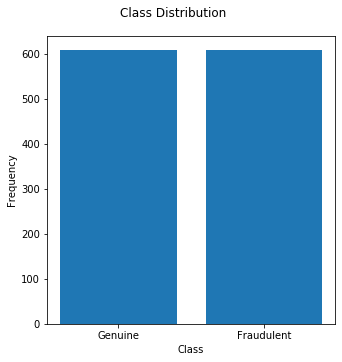

In [10]:
# Undersample majority class (genuine banknote observations) to generate balanced dataset
# shuffle observations in banknote_data and reset index
banknote_data = banknote_data.sample(frac=1, random_state=10).reset_index(drop=True)

# obtain indices of genuine observations in banknote_data
genuine_obs = banknote_data.loc[banknote_data['Class']==0].index
# obtain indices of fraudulent observations in banknote_data
fraudulent_obs = banknote_data.loc[banknote_data['Class']==1].index

# obtain random sample of genuine observations (we need 610 observations to make the dataset balanced!)
genuine_sample_obs = np.random.choice(genuine_obs, 610, replace=False)

# concat indices of fraudulent_obs and genuine_sample_obs
sample_obs = np.concatenate([genuine_sample_obs, fraudulent_obs])

# retrieve balanced data from banknote_data
balanced_banknote_data = banknote_data.loc[sample_obs]
# shuffle observations in balanced_banknote_data
balanced_banknote_data = balanced_banknote_data.sample(frac=1, random_state=10).reset_index(drop=True)

# check balanced_banknote_data is balanced through bar plot
genuine_obs_count = balanced_banknote_data.loc[balanced_banknote_data['Class']==0, 'Class'].count()
fraudulent_obs_count = balanced_banknote_data.loc[balanced_banknote_data['Class']==1, 'Class'].count()
# pyplot subplots
fig, axes = plt.subplots(figsize=(5, 5))
plt.bar(['Genuine', 'Fraudulent'], [genuine_obs_count, fraudulent_obs_count])
# assign labels to x-axis and y-axis
plt.xlabel('Class')
plt.ylabel('Frequency')
# adjust spacing properties of subplot
fig.subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9,
                    hspace=0.2, wspace=0.2)
# set title of subplot figure
fig.suptitle('Class Distribution')

# display heatmap
plt.show()

In [11]:
# split balanced_banknote_data into train and test set
# function for train and test set split
def train_test_split(dataset, test_size):
    # obtain indices of genuine observations in dataset
    genuine_obs = dataset.loc[dataset['Class']==0].index
    # obtain indices of fraudulent observations in dataset
    fraudulent_obs = dataset.loc[dataset['Class']==1].index
    
    # obtain random indices for genuine observations that consist for the training set
    genuine_train_obs = list(np.random.choice(genuine_obs, int(round(len(genuine_obs)*(1-test_size), 0)), replace=False))
    # obtain random indices for fraudulent observations that consist for the training set
    fraudulent_train_obs = list(np.random.choice(fraudulent_obs, int(round(len(fraudulent_obs)*(1-test_size), 0)), replace=False))
    
    # obtain indices for genuine observations that consist for the test set
    genuine_test_obs = list(set(genuine_obs)-set(genuine_train_obs))
    # obtain indices for fraudulent observations that consist for the test set
    fraudulent_test_obs = list(set(fraudulent_obs)-set(fraudulent_train_obs))
    
    # join genuine_train_obs and fraudulent_train_obs to obtain indices for training set
    train_obs = genuine_train_obs + fraudulent_train_obs
    # join genuine_test_obs and fraudulent_test_obs to obtain indices for test set
    test_obs = genuine_test_obs + fraudulent_test_obs
    
    # retrieve training set data from dataset and shuffle observations
    train_data = dataset.loc[train_obs].reset_index(drop=True)
    train_data = train_data.sample(frac=1, random_state=10).reset_index(drop=True)
    # retrieve test set date from dataset and shuffle observations
    test_data = dataset.loc[test_obs].reset_index(drop=True)
    test_data = test_data.sample(frac=1, random_state=10).reset_index(drop=True)
    
    return train_data, test_data

In [12]:
# obtain training and test data using train_test_split function
banknote_train_data, banknote_test_data = train_test_split(balanced_banknote_data, 0.25)

## Construct Functions for Naïve Bayes Classifier

The construction of a Naïve Bayes classifier can be broken down into the following steps:
- Separate the training data by class.
- Summarize the training data; calculate the mean and standard deviation.
- Summarize the training data by class.
- Construct a Gaussian Probability Density Function to calculate the likelihood of observing a given predictor.
- Calculate class probabilities.

Please note that credit is due to Jason Brownlee at [Machine Learning Mastery](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/).

In [13]:
# separate the training data by class
def separate_by_class(data):
    # create dictionary to store class values and corresponding observations 
    separated_data = dict()
    # loop over data and store observations in separated_data
    for i in range(len(data)):
        row_vector = data[i]
        class_value = row_vector[-1]
        if (class_value not in separated_data):
            separated_data[class_value] = list()
        separated_data[class_value].append(row_vector)
    # return dictionary containing data separated by class value
    return separated_data

In [14]:
# summarize the training data; calculate the mean and standard deviation
# function to calculate the mean
def mean(data):
    # mean calculation
    data_mean = sum(data)/float(len(data))
    # return data_mean
    return data_mean

# function to calculate the standard deviation
def standard_deviation(data):
    # retrieve the mean of data using the mean function above
    data_mean = mean(data)
    # calculate the variance
    data_variance = sum([(x-data_mean)**2 for x in data])/float(len(data)-1)
    # calculate the standard deviation from data_variance
    data_stdev = sqrt(data_variance)
    # returen data_stdev
    return data_stdev

# combine mean and standard_deviation functions in one function
def summarize_data(data):
    # store summarized statistics for each predictor in list 
    summaries = [(mean(column), standard_deviation(column), len(column)) for column in zip(*data)]
    # delete last tuple in list as this is for Class column of data
    del(summaries[-1])
    # return summaries
    return summaries

# function to create workflow of summarizing data statistics by class
def summarize_by_class(data):
    # separate the data by class using the separated_data function
    separated_data = separate_by_class(data)
    # create dictionary to store summarized statistics for each predictor separated by class
    summaries = dict()
    # loop over observations in separated_data
    for class_value, rows in separated_data.items():
        # store summarized statistics in summaries dictionary
        summaries[class_value] = summarize_data(rows)
    # return summaries
    return summaries

In [15]:
# construct a Gaussian PDF to calculate the likelihood of observing a perdictor value given a class
# function to calculate the Gaussian PDF function for a data point
def calculate_gaussian_pdf(x, data_mean, data_stdev):
    # calculate gaussian probability distribution function
    probability = (1/(sqrt(2*pi)*data_stdev)) * exp(-((x-data_mean)**2 / (2*(data_stdev)**2)))
    # return probability
    return probability

In [16]:
# calculate class probabilities
# function to calculate class probabilities
def calculate_class_probabilities(summaries, row):
    # retrieve count of total rows in data
    total_rows = sum([summaries[label][0][2] for label in summaries])
    # create dictionary to posteiror probabilities of classes
    probabilities = dict()
    # loop over class values and class summaries in summaries
    for class_value, class_summaries in summaries.items():
        # calculate prior of class
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        # loop over likelihood probabilities for each predictor
        for i in range(len(class_summaries)):
            data_mean, data_stdev, count = class_summaries[i]
            # calculate posterior of class 
            probabilities[class_value] *= calculate_gaussian_pdf(row[i], data_mean, data_stdev)
    # return probabilities
    return probabilities

## Predictions for Naïve Bayes Classifier

In order to make predictions with the Naïve Bayes classifier, we will create a 'predict' function using the calculate_class_probabilities function created in the cell above. Furthermore, we will create a function to fit the training set data (i.e. create the model) and make predictions on the entire test set data; the predictions will be stored in a list for easy reconciliation. 

In [17]:
# function to predict the class for a given observation
def predict_class(summaries, row):
    # retrieve class probabilities using calculate_class_probabilities function
    probabilities = calculate_class_probabilities(summaries, row)
    # set 'tracker' variables to keep track of best probabilities of any one of the two classes
    best_label, best_probability = None, -1
    # loop over class values and corresponding probabilities in probabilities
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_probability:
            best_probability = probability
            best_label = class_value
    # return best_label
    return best_label

# function to construct model and make predictions
def gaussian_naive_bayes(train_data, test_data):
    # calcualte essential statistics of the training set data
    summarize = summarize_by_class(train_data)
    # create list to store predictions made by the model
    predictions = list()
    # loop over observations in the test set data
    for row in test_data:
        # use the predict_class function to make predicitons of suitable class labels
        output = predict_class(summarize, row)
        # add observation's predicted class label to predictions
        predictions.append(output)
    # return predictions
    return predictions

## Accuracy Metric

To evaluate the (Gaussian) Naïve Bayes classifier, we will create a function that calculates the accuracy of the model. Note that the accuracy will be displayed as a percentage (%).

In [18]:
# function to calculate the accuracy percentage of model
def accuracy_metric(actual_labels, predicted_labels):
    # create variable to store the number of correct predictions
    correct_predictions = 0
    # loop over data and compare predicted labels and actual labels
    for i in range(len(actual_labels)):
        # if prediction is correct increment correct_predictions by 1
        if actual_labels[i] == predicted_labels[i]:
            correct_predictions += 1
    # calculate prediction accuracy
    accuracy = correct_predictions/float(len(actual_labels)) * 100
    # return accuracy
    return accuracy

## K-fold Cross Validation

To ensure that the (Gaussian) Naïve Bayes classifier generalizes to the dataset, we will build a function to conduct k-fold cross validation.

In [19]:
# function to split dataset into k folds
def k_fold_cross_val_split(data, n_folds):
    # create a list to store data for the relevant dataset split
    dataset_split = list()
    # copy data into a list
    dataset_copy = list(data)
    # calculate the data fold size
    fold_size = int(len(data)/n_folds)
    # loop over folds of data
    for _ in range(n_folds):
        # create new list to store fold data
        fold = list()
        while len(fold) < fold_size:
            index = random.randrange(len(dataset_copy))
            # note that pop removes a item in a given list and returns that specific item
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    # return dataset_split
    return dataset_split

## Evaluating the Naïve Bayes Classifier

The final step is to construst a function to evaluate the cross validation performance of the Naïve Bayes classifier using the functions that have been formed in the code above. Note: As we are only using the training data (banknote_train_data) here as we are using the k-fold cross validation to split between individual train and test sets.

In [20]:
# function to evaluate naive bayes classifier
def evaluate_algorithm(data, algorithm, n_folds, *args):
    # split data into k folds using cross validation functiom
	folds = k_fold_cross_val_split(data, n_folds)
    # create list to store accuracy scores
	accuracy_scores = list()
    # loop over data in folds 
	for fold in folds:
        # store data in train set
		train_set_data = list(folds)
        # remove one fold for test set (validation)
		train_set_data.remove(fold)
		train_set_data = sum(train_set_data, [])
        # create list to store test set data observations
		test_set_data = list()
        # loop over observations in fold comprimising of test set data
		for row in fold:
            # copy observation to list
			row_copy = list(row)
            # add observation to test_set_data 
			test_set_data.append(row_copy)
            # remove the class label of the observation for testing
			row_copy[-1] = None
        # retrieve predicted class labels for test_set_data
		predicted_labels = algorithm(train_set_data, test_set_data, *args)
        # retrieve correct class labels
		actual_labels = [row[-1] for row in fold]
        # calculate accuracy percentage of fold
		accuracy = accuracy_metric(actual_labels, predicted_labels)
        # add accuracy percentage to accuracy_scores
		accuracy_scores.append(accuracy)
    # return accuracy scores
	return accuracy_scores

In [21]:
# evaluate naive bayes classifier using 10-fold cross validation
model_scores = evaluate_algorithm(banknote_train_data.values.tolist(), gaussian_naive_bayes, 10)
# display model_scores
print('Model scores: %s' %(model_scores))

# calculate mean accuracy of model
mean_accuracy = sum(model_scores)/float(len(model_scores))
# display mean_accuracy
print('Mean accuracy of model: %.3f%%' %(mean_accuracy))

Model scores: [91.20879120879121, 83.51648351648352, 72.52747252747253, 90.10989010989012, 83.51648351648352, 90.10989010989012, 80.21978021978022, 78.02197802197803, 82.41758241758241, 85.71428571428571]
Mean accuracy of model: 83.736%


## Evaluating the Naïve Bayes Classifier (Using Test Set)

In the code above we only used the banknote_train_data to train and test our (Gaussian) Naïve Bayes classifier; this was done because we used 10-fold cross validation. Now we will train a Naïve Bayes classifier on the whole banknote_train_data and test on banknote_test_data.

In [22]:
# train (fit) a naive bayes classifier on the banknote_train_data
training_set = banknote_train_data.values.tolist()
model = summarize_by_class(training_set)

# test model on banknote_test_data and calculate prediction accuracy
test_set = banknote_test_data.values.tolist()
# create 'tracker' variable to track correct number of predictions
correct_predictions = 0
# loop over observations in test_set
for i in range(len(test_set)):
    # predict label for test_set observation using predict_class function
    predicted_label = predict_class(model, test_set[i][0:4])
    # retrieve actual label for test_set observation
    actual_label = test_set[i][-1]
    # if predicted and actual labels are identical increment correct_predictions by 1
    if predicted_label == actual_label:
        correct_predictions += 1

# calculate prediction accuracy on test_set
prediction_accuracy = correct_predictions/float(len(test_set)) *100
# display prediction_accuracy
print('Prediction accuracy on test set data: %.3f%%' %(prediction_accuracy))

Prediction accuracy on test set data: 85.197%
